<a href="https://colab.research.google.com/github/Hamdan070905/Week4-NSP/blob/main/NSP_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Loaded: (1470, 35)
✅ After SMOTE Balancing: [1233 1233]

 Logistic Regression
Accuracy: 75.71 %
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       250
           1       0.73      0.80      0.77       244

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.76       494
weighted avg       0.76      0.76      0.76       494


 Random Forest
Accuracy: 93.52 %
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       250
           1       0.96      0.91      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494


 XGBoost
Accuracy: 92.91 %
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       250
           1       0.95      0.90      0.93       244

    accuracy      

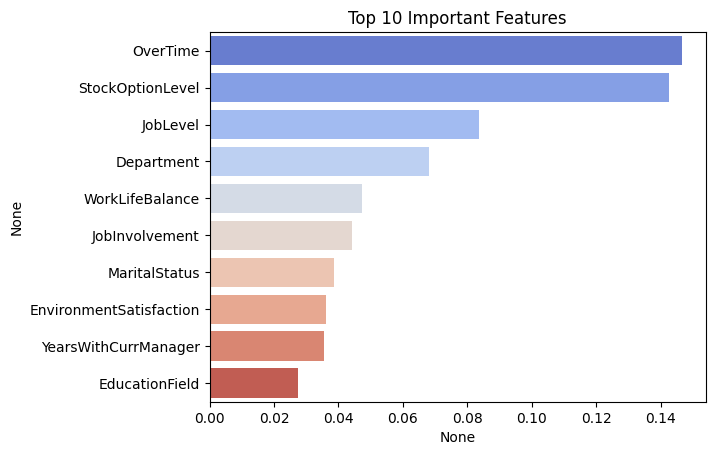

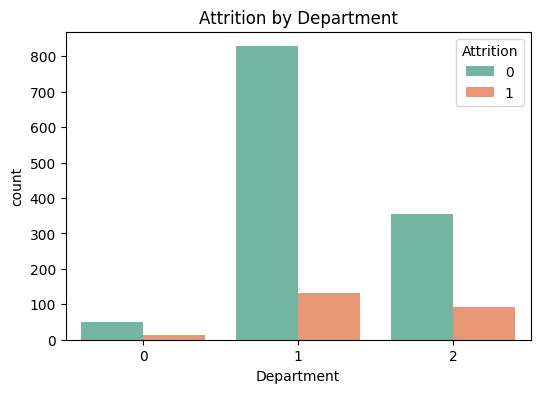

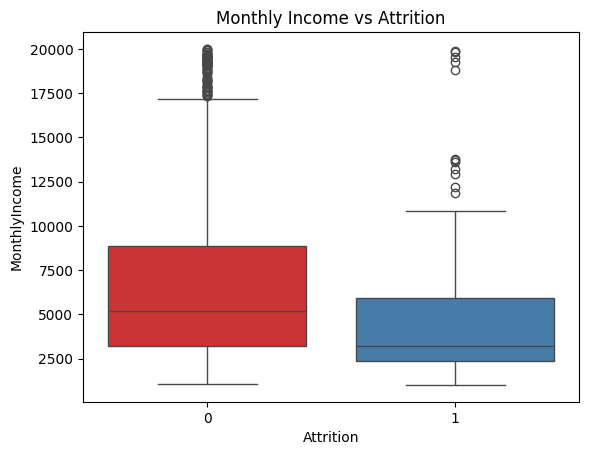

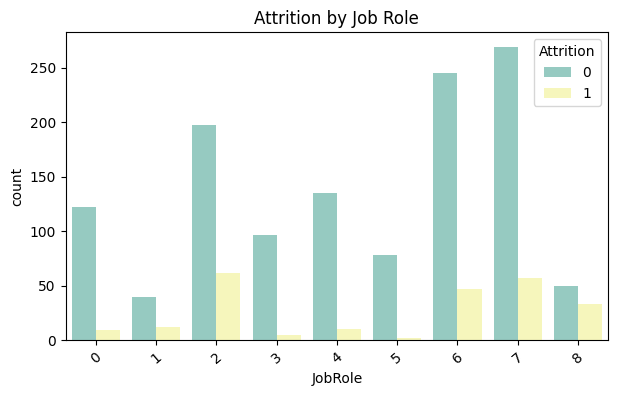

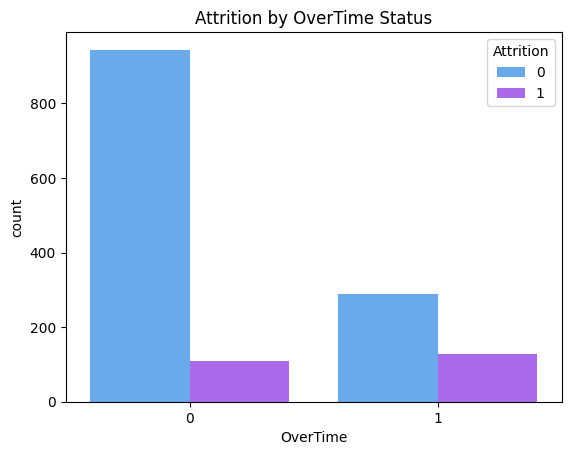

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("IBM HR Analytics Performance.csv")
print(" Data Loaded:", df.shape)

le = LabelEncoder()
for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X = StandardScaler().fit_transform(X)
print(X)

X, y = SMOTE(random_state=42).fit_resample(X, y)
print(" After SMOTE Balancing:", np.bincount(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n {name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
    print(classification_report(y_test, y_pred))

xgb = models["XGBoost"]
imp = pd.Series(xgb.feature_importances_, index=df.drop('Attrition', axis=1).columns)
top = imp.sort_values(ascending=False)[:10]

sns.barplot(x=top, y=top.index, palette="coolwarm")
plt.title("Top 10 Important Features")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Department')
plt.show()

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set1')
plt.title('Monthly Income vs Attrition')
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition by Job Role')
plt.xticks(rotation=40)
plt.show()

sns.countplot(x='OverTime', hue='Attrition', data=df, palette='cool')
plt.title('Attrition by OverTime Status')
plt.show()


In [ ]:
le = LabelEncoder()
for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])
print(df.head())

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
print(X.head())
print(y.head())

In [ ]:
X = StandardScaler().fit_transform(X)
print(X)

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    print(f"\n {name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
    print(classification_report(y_test, y_pred))
xgb = models["XGBoost"]
imp = pd.Series(xgb.feature_importances_, index=df.drop('Attrition', axis=1).columns)
top = imp.sort_values(ascending=False)[:10]


 Logistic Regression
Accuracy: 75.71 %
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       250
           1       0.73      0.80      0.77       244

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.76       494
weighted avg       0.76      0.76      0.76       494


 Random Forest
Accuracy: 93.52 %
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       250
           1       0.96      0.91      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494


 XGBoost
Accuracy: 92.91 %
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       250
           1       0.95      0.90      0.93       244

    accuracy                           0.93       494
   macro avg       0.93   

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}